# Tarea 0

### Configuración inicial

Primero, se debe crear un entorno virtual para evitar incompatibilidades con el resto del sistema. La celda de abajo se debe copiar y pegar en la terminal antes de correr el notebook.

In [3]:
%%sh
if [ ! -d ".venv" ]; then
    python3 -m venv .venv
    echo "Virtual environment created."
else
    echo "Virtual environment already exists."
fi

Virtual environment already exists.


Luego, se debe crear un entorno virtual e instalar las dependencias de Python necesarias.

In [4]:
import os
import platform

GREEN = '\033[92m'
BLUE = '\033[94m'
YELLOW = '\033[93m'
RED = '\033[91m'
RESET = '\033[0m'

system = platform.system().lower()

if system in ['linux', 'darwin']:  #*Linux or macOS
    activate_script = ".venv/bin/activate"
    print(f"To activate: {GREEN}source {activate_script}{RESET}")
elif system == 'windows':
    activate_script = ".venv\\Scripts\\activate.bat"
    print(f"To activate: {GREEN}{activate_script}{RESET}")
else:
    print(f"{RED}Unknown OS. Please activate manually.{RESET}")

if os.path.exists(".venv"):
    print(f"{BLUE}Virtual environment found.{RESET}")
else:
    print(f"{YELLOW}Virtual environment not found. Please create it first.{RESET}")

To activate: source .venv/bin/activate
Virtual environment found.


In [5]:
%%bash
source .venv/bin/activate

bash: line 1: .venv/bin/activate: No such file or directory


CalledProcessError: Command 'b'source .venv/bin/activate\n'' returned non-zero exit status 1.

In [6]:
!pip install numpy networkx matplotlib scipy pandas

## Parámetros iniciales <a id="param"></a>

In [7]:
p_values: list[float] = [i/3 for i in range (1, 3)]
n_values: list[int] = [n for n in range (2, 10)]

## Funciones extra

Su objetivo es reutilizar código y abstraer diversos procesos para enfocarse en el análisis de complejidad de los dos algoritmos

In [8]:
import numpy as np

def build_p_matrices(chain: int = 1,
                     p_values: list[float] = [n/10 for n in range (1, 10)],
                     n_values: list[float] = [n for n in range(2, 5)]) -> list[np.array]:
    """
    Return all the possible transition matrices
    """
    valid_chains: list[int] = [1, 2, 3]
    if chain not in valid_chains:
        raise ValueError(f"Invalid chain selected. Please choose one of the list: {valid_chains}")

    if chain == 1:
        #*Construction of the transition matrices
        matrices: list[np.array] = []
        i: int = 0
        for n in n_values:
            for p in p_values:
                q: float = 1 - p
                matrix: np.array = np.zeros((n, n))
                matrix[0][0] = q
                matrix[n - 1][n - 1] = p
                for i in range (0, n - 1):
                    #*Forward (l to r) -> p
                    matrix[i][i + 1] = p
                    #*Backward (r to l) -> q
                    matrix[i + 1][i] = q
                # print(p, q)
                print(matrix)

                matrices.append(matrix.T)
                i += 1
        return matrices

    if chain == 2:
        return

    if chain == 3:
        return

def get_distributions(candidates: list[np.array]) -> list[np.array]:
    """
    The distribution should have non-negative entries and the entries in each
    row must sum 1.
    """
    return [v for v in candidates if np.isclose(v.sum(), 1, atol=1e-4) and np.all(v >= 0)]

def print_distributions(valid_candidates: list[list[np.array]]) -> None:
    i: int = 1
    for c in valid_candidates:
        print(f"Stationary distribution of the matrix")
        print(c)
        i += 1


## Cadenas

### Cadena 1

La cadena de Markov que se tratará a continuación es la sugerencia inicial realizada por el docente. Es una cadena irreducible y aperiódica. Una caracterízación y una representación gráfica de esta se puede ver a continuación, así como su simulación.
> - Es irreducible ya que $p, q > 0$.
> - Es aperiódica ya que:
>   - Del estado $i \neq n$ se puede ir al estado $i$ en $2(n - i)$ pasos (yendo al extremo derecho y devolvíendose) y en $2(n - i) + 1$ pasos (quedándose en el extremo, $n$, por un paso). Como $\text{mcd}(2(n - i), 2(n - i) + 1) = 1$, ya está.
>   - Del estado $n$ al estado $n$ se puede ir en $2n$ (yendo al extremo izquierdo y devolvíendose) o en $2n + 1$ pasos (quedándose en el extremo izquierdo, $1$, por un paso).
>   - Del estado $i$ al estado $j$, idea: ir de i a i y luego de i a j, asumiendo i < j, y utilizando lo mismo que en los dos anteriores

[[0.7 0.3 0.  0.  0. ]
 [0.7 0.  0.3 0.  0. ]
 [0.  0.7 0.  0.3 0. ]
 [0.  0.  0.7 0.  0.3]
 [0.  0.  0.  0.7 0.3]]
[[0.7 0.7 0.  0.  0. ]
 [0.3 0.  0.7 0.  0. ]
 [0.  0.3 0.  0.7 0. ]
 [0.  0.  0.3 0.  0.7]
 [0.  0.  0.  0.3 0.3]]
[(1, 1, 0), (1, 2, 1), (2, 1, 2), (2, 3, 3), (3, 2, 4), (3, 4, 5), (4, 3, 6), (4, 5, 7), (5, 4, 8), (5, 5, 9)]
{(1, 1): '0.70', (1, 2): '0.70', (2, 1): '0.30', (2, 3): '0.70', (3, 2): '0.30', (3, 4): '0.70', (4, 3): '0.30', (4, 5): '0.70', (5, 4): '0.30', (5, 5): '0.30'}


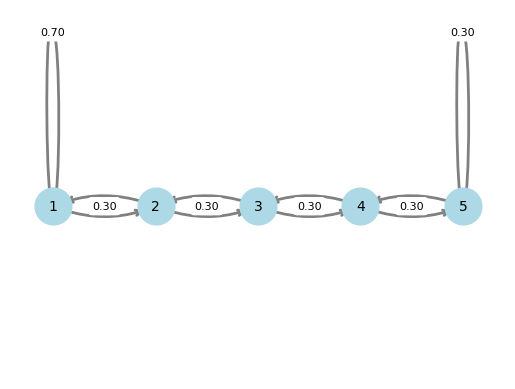

In [9]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.MultiDiGraph()
n: int = 5
p: float = 0.3
P: np.array = build_p_matrices(chain=1, p_values=[p], n_values=[n])[0]
states: list[int] = [i for i in range (1, n + 1)]

edges: list[tuple] = []
k: int = 0
for i in range(n):
    for j in range(n):
        if P[i][j] != 0:
            edges.append((i + 1, j + 1, k))
            k += 1

print(P)
print(edges)

# Arrange nodes linearly on the x-axis
pos = {state: (state, 0) for state in states}
G.add_nodes_from(states)
G.add_edges_from(edges)

nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=700)
nx.draw_networkx_edges(G, pos, arrowstyle="->", arrowsize=10, edge_color='gray', width=2, connectionstyle="arc3,rad=0.2")
#nx.draw_networkx_edge_labels(G, pos, font_size=10, font_color='black', label_pos=0.9)
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

edge_labels = {}
for i in range(n):
    for j in range(n):
        if P[i][j] != 0:
            edge_labels[(i + 1, j + 1)] = f'{P[i][j]:.2f}'

print(edge_labels)

nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=8)

plt.axis('off')
plt.show()

###Visualización

[[0.7 0.3 0.  0.  0. ]
 [0.7 0.  0.3 0.  0. ]
 [0.  0.7 0.  0.3 0. ]
 [0.  0.  0.7 0.  0.3]
 [0.  0.  0.  0.7 0.3]]
[[0.7 0.7 0.  0.  0. ]
 [0.3 0.  0.7 0.  0. ]
 [0.  0.3 0.  0.7 0. ]
 [0.  0.  0.3 0.  0.7]
 [0.  0.  0.  0.3 0.3]]
Self loops: [(1, 1), (5, 5)]
Forward edges: [(1, 2), (2, 1), (2, 3), (3, 2), (3, 4), (4, 3), (4, 5), (5, 4)]
Self loop labels: {(1, 1): '0.7', (5, 5): '0.3'}
Forward edge labels: {(1, 2): '0.7', (2, 1): '0.3', (2, 3): '0.7', (3, 2): '0.3', (3, 4): '0.7', (4, 3): '0.3', (4, 5): '0.7', (5, 4): '0.3'}


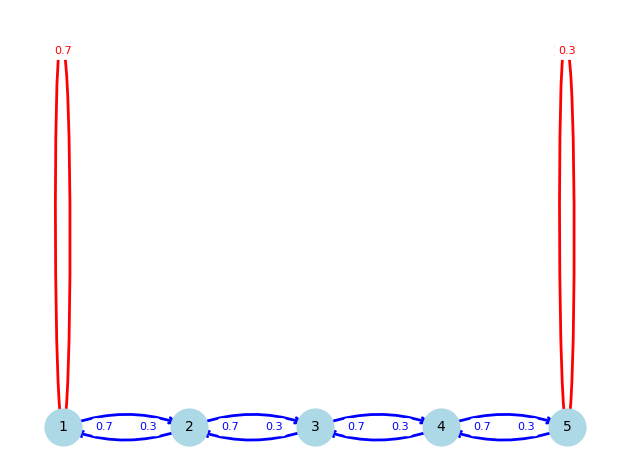

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.MultiDiGraph()
n: int = 5
p: float = 0.3
P: np.array = build_p_matrices(chain=1, p_values=[p], n_values=[n])[0]
states: list[int] = [i for i in range(1, n + 1)]

print(P)

# Arrange nodes linearly on the x-axis
pos = {state: (state, 0) for state in states}
G.add_nodes_from(states)

# Separate self-loops and forward edges for different styling
self_loops = []
forward_edges = []
self_loop_labels = {}
forward_edge_labels = {}

for i in range(n):
    for j in range(n):
        if P[i][j] != 0:
            edge = (i + 1, j + 1)
            if i == j:  # Self-loop
                self_loops.append(edge)
                self_loop_labels[edge] = f'{P[i][j]:.1f}'
            else:  # Forward edge
                forward_edges.append(edge)
                forward_edge_labels[edge] = f'{P[i][j]:.1f}'

G.add_edges_from(self_loops)
G.add_edges_from(forward_edges)

print("Self loops:", self_loops)
print("Forward edges:", forward_edges)
print("Self loop labels:", self_loop_labels)
print("Forward edge labels:", forward_edge_labels)

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_color='lightblue', node_size=700)

# Draw self-loops with larger arc radius (above the nodes)
if self_loops:
    nx.draw_networkx_edges(G, pos,
                          edgelist=self_loops,
                          arrowstyle="->",
                          arrowsize=15,
                          edge_color='red',
                          width=2,
                          connectionstyle="arc3,rad=0.8")

# Draw forward edges with smaller arc radius (below the nodes)
if forward_edges:
    nx.draw_networkx_edges(G, pos,
                          edgelist=forward_edges,
                          arrowstyle="->",
                          arrowsize=10,
                          edge_color='blue',
                          width=2,
                          connectionstyle="arc3,rad=-0.2")

# Draw node labels
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

# Draw edge labels with different positioning
if self_loop_labels:
    # Position self-loop labels above the nodes
    nx.draw_networkx_edge_labels(G, pos,
                                self_loop_labels,
                                font_size=8,
                                font_color='red',
                                label_pos=0.5)

if forward_edge_labels:
    # Position forward edge labels on the edges (slightly below)
    nx.draw_networkx_edge_labels(G, pos,
                                forward_edge_labels,
                                font_size=8,
                                font_color='blue',
                                label_pos=0.3)

plt.axis('off')
plt.tight_layout()
plt.show()

## Métodos para encontrar la distribución estacionaria

Ya que las cadenas presentadas anteriormente son irreducibles y aperiódicas, su distribución estacionaria existe y es única. Ahora, se calculará usando dos métodos diferentes, comparando la eficiencia temporal de estos:

### Hallando los autovectores de $P^\intercal$

Se sabe que una distribución $\pi$ se le llama estacionaria si
$$\pi P = \pi$$
o equivalentemente
$$P^{\intercal} \pi^{\intercal} = \pi^{\intercal}$$
por lo tanto, hallar $\pi$ se reduce a hallar un autovector de la matriz $P^{\intercal}$.

Dicho autovector se hallará utilizando las librerías `numpy` y `scipy`, las más populares en cálculo científico, y `simpy`, una librería de cálculo simbólico. Normalmente, bastaría con la primera, mas sin embargo, como explican en [esta pregunta en StackOverflow](https://stackoverflow.com/questions/6684238/whats-the-fastest-way-to-find-eigenvalues-vectors-in-python), `scipy` identifica diversos tipos de matrices y ajusta los cálculos de los autovectores de acuerdo al mejor algoritmo que aplique para cada tipo. Por otro lado, `simpy` seguramente será la más lenta de las tres, pero proverá una buena indicación de qué tanto tardaría el proceso si se busca exactitud en la solución (o precisión casi infinita).

Ahora, independientemente de qué librería o lenguaje se utilice, es estándar retornar los autovectores normalizados (bajo la norma euclídea estándar). Por lo tanto, se deberá hacer un cálculo extra para asegurar que al menos uno de los autovectores $v$ cumpla que $\sum_{i = 1}^{n}v_i = 1$ y que $0 \leq v_i \leq 1$ para todo $i \in \{1, ..., n\}$. Este consiste en computar un escalar $x \in \mathbb{R}$ tal que

$$\frac{\sum_{i = 1}^n v_i}{x} = 1 \iff x = \sum_{i = 1}^n v_i$$

y dividir a cada componente del vector $v$ para obtener un candidato a distribución estacionaria $v' = (\frac{v_1}{x}, \frac{v_2}{x}, ..., \frac{v_n}{x})$.

#### Cadena 1

In [11]:
matrices = build_p_matrices(chain=1, p_values=p_values, n_values=n_values)

[[0.66666667 0.33333333]
 [0.66666667 0.33333333]]
[[0.33333333 0.66666667]
 [0.33333333 0.66666667]]
[[0.66666667 0.33333333 0.        ]
 [0.66666667 0.         0.33333333]
 [0.         0.66666667 0.33333333]]
[[0.33333333 0.66666667 0.        ]
 [0.33333333 0.         0.66666667]
 [0.         0.33333333 0.66666667]]
[[0.66666667 0.33333333 0.         0.        ]
 [0.66666667 0.         0.33333333 0.        ]
 [0.         0.66666667 0.         0.33333333]
 [0.         0.         0.66666667 0.33333333]]
[[0.33333333 0.66666667 0.         0.        ]
 [0.33333333 0.         0.66666667 0.        ]
 [0.         0.33333333 0.         0.66666667]
 [0.         0.         0.33333333 0.66666667]]
[[0.66666667 0.33333333 0.         0.         0.        ]
 [0.66666667 0.         0.33333333 0.         0.        ]
 [0.         0.66666667 0.         0.33333333 0.        ]
 [0.         0.         0.66666667 0.         0.33333333]
 [0.         0.         0.         0.66666667 0.33333333]]
[[0.3333333

In [12]:
#!Consider creating an object that stores all the matrices with n states to have a better reference when printing

In [13]:
import scipy

def stationary_candidates_scipy(matrix) -> list[np.array]:
    # print("   Using scipy...")
    candidates: list[np.array] = []
    # print(f"Candidates for the matrix")
    eigen_values, eigen_vectors = scipy.linalg.eig(matrix)
    current_candidates: list[np.array] = []
    for v in eigen_vectors:
        candidates.append(v / v.sum())
    return get_distributions(candidates)


In [14]:
for matrix in matrices:
    print_distributions(stationary_candidates_scipy(matrix))
#!Precission issue


Stationary distribution of the matrix
[0.38742589 0.61257411]
Stationary distribution of the matrix
[0.61257411 0.38742589]
Stationary distribution of the matrix
[0.22210763 0.40732446 0.3705679 ]
Stationary distribution of the matrix
[0.30149546 0.50301982 0.19548471]
Stationary distribution of the matrix
[0.10680805 0.17978474 0.31139631 0.4020109 ]


In [15]:
def stationary_candidates_numpy(matrix):
    candidates: list[np.array] = []
    # print(f"Candidates for {i}th matrix")
    eigen_values, eigen_vectors = np.linalg.eig(matrix)
    for v in eigen_vectors:
        candidates.append(v/v.sum())
    # print(candidates)

    return get_distributions(candidates)



In [16]:
for matrix in matrices:
    print_distributions(stationary_candidates_numpy(matrix))

Stationary distribution of the matrix
[0.38742589 0.61257411]
Stationary distribution of the matrix
[0.61257411 0.38742589]
Stationary distribution of the matrix
[0.22210763 0.40732446 0.3705679 ]
Stationary distribution of the matrix
[0.30149546 0.50301982 0.19548471]
Stationary distribution of the matrix
[0.10680805 0.17978474 0.31139631 0.4020109 ]


### Usando la fórmula de recurrencia

Ya que las cadenas trabajadas son homogéneas, aperiódicas e irreducibles, la distribución estacionaria es única por el teorema 5.3 visto en clase. Además, por ejercicio ... (realizar ejercicio), se sabe que esta distribución tendrá la forma
$$\pi = \left(\frac{1}{\mathbb{E}_1[T_1^+]}, \frac{1}{\mathbb{E}_2[T_2^+]}, ..., \frac{1}{\mathbb{E}_n[T_n^+]}\right) = \left(\frac{1}{r_1}, \frac{1}{r_2}, ..., \frac{1}{r_n}\right)$$
Además, para todo $i \in \{1, ..., n\}$, $r_i := \mathbb{E}_i[T_i^+] = 1 + \sum_{j \in S}P_{ij} t_{j, \{i\}}$, y como $t_{i, \{i\}} := \mathbb{E}_i[T_i] = 0$ (pues si $X_0 = i$, ya se está en el estado al que se quería retornar), se puede descartar el caso en que $j = i$. Luego,
$$r_i = \mathbb{E}_i[T_i^+] = 1 + \sum_{j \in S, j \neq i}P_{ij} t_{j, \{i\}} = (\pi_i)^{-1}$$
donde $\pi$ es la distribución estacionaria de cada cadena, $P$ es la matriz de transición de la cadena, y $t_{j, \{i\}} := \mathbb{E}_i[T_{\{i\}}] = 1 + \sum_{j \in S^t} P_{ij} t_{j, \{i\}}$ el tiempo medio de llegada al estado $i$ desde el estado $j$.

La forma de calcular los tiempos medios de llegada a un estado desde otro es recurrentemente, es decir, se va formando un sistema de ecuaciones con los $i, j \in S$ necesarios para poder calcular los $t_{j, \{i\}}$ requeridos. Este cálculo se realizará a continuación representando dicho sistema como una matriz que va creciendo a medida en que se requiren más $t_{j, \{i\}}$.

Idea: hacer un llamado recurrente cada que se necesite un $t_{ij}$ e irlos almacenando en una lista. Hacer una máscara con los elementos de la suma que sean $0$ (e.g., $t_{ii}$); si el único no sero es el $t_{ij}$ requerido, se puede calcular con una suma directa. De otro modo, se buscarán los $t_{ik}$ necesarios en la lista, y si no están, se hace un llamado recurrente.

In [17]:
matrices = build_p_matrices(chain=1, p_values=[n/10 for n in range (1, 10)], n_values=[n for n in range(2, 10)])

[[0.9 0.1]
 [0.9 0.1]]
[[0.8 0.2]
 [0.8 0.2]]
[[0.7 0.3]
 [0.7 0.3]]
[[0.6 0.4]
 [0.6 0.4]]
[[0.5 0.5]
 [0.5 0.5]]
[[0.4 0.6]
 [0.4 0.6]]
[[0.3 0.7]
 [0.3 0.7]]
[[0.2 0.8]
 [0.2 0.8]]
[[0.1 0.9]
 [0.1 0.9]]
[[0.9 0.1 0. ]
 [0.9 0.  0.1]
 [0.  0.9 0.1]]
[[0.8 0.2 0. ]
 [0.8 0.  0.2]
 [0.  0.8 0.2]]
[[0.7 0.3 0. ]
 [0.7 0.  0.3]
 [0.  0.7 0.3]]
[[0.6 0.4 0. ]
 [0.6 0.  0.4]
 [0.  0.6 0.4]]
[[0.5 0.5 0. ]
 [0.5 0.  0.5]
 [0.  0.5 0.5]]
[[0.4 0.6 0. ]
 [0.4 0.  0.6]
 [0.  0.4 0.6]]
[[0.3 0.7 0. ]
 [0.3 0.  0.7]
 [0.  0.3 0.7]]
[[0.2 0.8 0. ]
 [0.2 0.  0.8]
 [0.  0.2 0.8]]
[[0.1 0.9 0. ]
 [0.1 0.  0.9]
 [0.  0.1 0.9]]
[[0.9 0.1 0.  0. ]
 [0.9 0.  0.1 0. ]
 [0.  0.9 0.  0.1]
 [0.  0.  0.9 0.1]]
[[0.8 0.2 0.  0. ]
 [0.8 0.  0.2 0. ]
 [0.  0.8 0.  0.2]
 [0.  0.  0.8 0.2]]
[[0.7 0.3 0.  0. ]
 [0.7 0.  0.3 0. ]
 [0.  0.7 0.  0.3]
 [0.  0.  0.7 0.3]]
[[0.6 0.4 0.  0. ]
 [0.6 0.  0.4 0. ]
 [0.  0.6 0.  0.4]
 [0.  0.  0.6 0.4]]
[[0.5 0.5 0.  0. ]
 [0.5 0.  0.5 0. ]
 [0.  0.5 0.  0.5]
 [0.  0.  0.5 

In [18]:
import numpy as np

def calculate_st_distr_rf(matrix: np.array) -> np.array:
    """
    Function to calculate the stationary distribution of a Markov chain
    with transition matrix `matrix` using the recurrence formulas
    """
    r: list[float] = []
    for i in range(matrix.shape[0]):
        r.append()

# def t(i: int, j: int, n: int, t_kj: list[float] = None):
#     """
#     Mean return time to state j starting from state 1. It is the same as
#     to t_{i, A} considering A to be the singleton of j.
#     It will be calculated as follows: the elements in t_kj will be
#     t_{k,\{j\}} for k a state of the chain. If one of those is None,
#     """

def generate_t_matrix(P:np.array) -> np.array:
    """
    Returns a n^2 x n^2 matrix T whose entry
    (i, j) = (q_1 n + r_1, q_2 n + r_2) (where q_i, r_i are obtained using
    the division algorithm)
    - is 0 if i \not \in \{1, 2 + n, ..., i + (i-1)n, ..., n + n\},
    i.e., it doesn't correspond to a mean return time in the form
    t_{k, j}, where k is any state of the chain.
    - is P_{r_1, r_2}, a.k.a., P_{i, k}, otherwise.
    """
    n: int = P.shape[0]
    T: np.array = np.zeros(shape=(n*n, n*n))
    # print(T)
    #!Consider addin a rule for t_i,i to be  0
    #*Filling the non-zero values of t(i, j)
    for i in range(n):
        for j in range(n):
            if j == i:
                j += 1
                continue
            n_mult: int = 0 #*n multiplier
            for k in range(n):
                #*Since k starts from 0, there is no need to multiply n by k - 1
                k_val: int = i + j*n
                j_val: int = j + n*k
                i_val: int = i
                print(i, k, P[i][k], (i*n + j, j + n*k))
                T[i*n + j, j + n*k] = P[i][k]
                # print(i, j, k, P[i][k], (i*n + j, k + n*k))

    return T

def pretty_print(M: np.array, h_indices: list[str] = None, v_indices: list[str] = None) -> None:
    if h_indices is None:
        h_indices = [i for i in range(M.shape[1])]
    if v_indices is None:
        v_indices = [i for i in range(M.shape[0])]

    n_rows, n_cols = M.shape
    # Determine column width based on the longest h_indices string (at least 7)
    col_width = max(8, max(len(str(idx)) for idx in h_indices) + 1)
    # Print column indices
    print(" " * (col_width + 1), end="")
    for index in h_indices:
        print(f"{index:>{col_width}}", end="")
    print()
    # Print each row with its index
    for row in range(n_rows):
        print(f"{v_indices[row]:>3} |", end="")
        for col in range(n_cols):
            print(f"{M[row, col]:{col_width}.2f}", end="")
        print()

def generate_index_labels(prefix: str, n: int, m: int) -> list[str]:
    """
    Returns a list of strings in the format 'prefix(i, j)' for i in range(1, n + 1),
    j in range(1, m+1), listed in lexicographical order.
    """
    return [f"{prefix}({i}, {j})" for i in range(1, n+1) for j in range(1, m+1)]

def get_necessary_tijs(i: int, j: int, n: int, T:np.array, N: np.array) -> np.array:
    #*First, map the non-zero entries of row i to 1's
    print(i*n + j)
    print("T[i,j]", T[i*n + j])
    N_row = (T[i*n + j] != 0).astype(int)
    print("N_row", N_row)
    non_zero_indices = np.nonzero(N_row)[0]
    print("NN indices", non_zero_indices)
    non_zero_count = np.count_nonzero(T[i*n + j])
    print((i, j), N_row)
    already_in_N = np.count_nonzero(np.logical_and(N_row, N.flatten()))
    if already_in_N == non_zero_count:
        return N
    else:
        for index in non_zero_indices:
            N = get_necessary_tijs(index%n, index//n, n, T, N)




def get_tij_matrix(i: int, j: int, n: int, T: np.array) -> np.array:
    """
    'Trims' columns and rows of the T matrix to get the minimum system required
    to calculate t_ij.
    """
    #*N will be a boolean row vector whose (k*n+l)-th entry indicates whether
    #*t_{k, \{l\}} is necessary for the computation of t_{i, \{j\}}
    N: np.array = np.zeros(shape=n*n)
    N: np.array = get_necessary_tijs(i, j, n, T, N)





<>:25: SyntaxWarning: invalid escape sequence '\i'
<>:25: SyntaxWarning: invalid escape sequence '\i'
/tmp/ipython-input-375629185.py:25: SyntaxWarning: invalid escape sequence '\i'
  - is 0 if i \not \in \{1, 2 + n, ..., i + (i-1)n, ..., n + n\},


In [19]:
P: np.array = np.array(
    [[1/2, 1/2, 0],
     [0, 1/3, 2/3],
     [1/2, 1/2, 0]]
)
T = generate_t_matrix(P)
indices: list[str] = generate_index_labels("T", P.shape[0], P.shape[1])
pretty_print(T, indices, indices)
get_tij_matrix(2, 1, P.shape[0], T)


Streaming output truncated to the last 5000 lines.
N_row [0 1 0 0 1 0 0 0 0]
NN indices [1 4]
(np.int64(0), np.int64(1)) [0 1 0 0 1 0 0 0 0]
3
T[i,j] [0.         0.         0.         0.33333333 0.         0.
 0.66666667 0.         0.        ]
N_row [0 0 0 1 0 0 1 0 0]
NN indices [3 6]
(np.int64(1), np.int64(0)) [0 0 0 1 0 0 1 0 0]
1
T[i,j] [0.  0.5 0.  0.  0.5 0.  0.  0.  0. ]
N_row [0 1 0 0 1 0 0 0 0]
NN indices [1 4]
(np.int64(0), np.int64(1)) [0 1 0 0 1 0 0 0 0]
3
T[i,j] [0.         0.         0.         0.33333333 0.         0.
 0.66666667 0.         0.        ]
N_row [0 0 0 1 0 0 1 0 0]
NN indices [3 6]
(np.int64(1), np.int64(0)) [0 0 0 1 0 0 1 0 0]
1
T[i,j] [0.  0.5 0.  0.  0.5 0.  0.  0.  0. ]
N_row [0 1 0 0 1 0 0 0 0]
NN indices [1 4]
(np.int64(0), np.int64(1)) [0 1 0 0 1 0 0 0 0]
3
T[i,j] [0.         0.         0.         0.33333333 0.         0.
 0.66666667 0.         0.        ]
N_row [0 0 0 1 0 0 1 0 0]
NN indices [3 6]
(np.int64(1), np.int64(0)) [0 0 0 1 0 0 1 0 0]
1
T[i,

RecursionError: maximum recursion depth exceeded

## Usando la fórmula de recurrencia

In [20]:
def t_ij_Matrix(P_matrix: np.array) -> np.array:
  """
  The main idea is to calculate all the states t_{i,j} but keeping fixed j and then iterating over i, since all the states depend only on these:
  e.g : t_1,0 = 1 + P_1,0 . t_0,0 + P_1,1 . t_1,0 + P_1,2 . t_2,0
  This means that all the t_i,0 can be calculated with this 2x2 system of equations, since t00 = 0.
  """
  t_ij_M = []
  rows = P_matrix.shape[0]


  for j in range(0,rows):
    valid_states = [i for i in range(rows) if i != j]

    n = rows - 1
    submatrix = np.zeros((n, n), dtype=float)
    ones = np.ones(n, dtype=float)

    for r, i in enumerate(valid_states):
        for c, d in enumerate(valid_states):
            if i == d:
                submatrix[r, c] = 1.0 - P_matrix[i, i] # Notice that we can always factor the ti,j that we want to calculate. See in the example that t_1,0 is at the left and right side of the equation.
            else:
                submatrix[r, c] = - P_matrix[i, d] # Else, the matrix entrance will be the probability

    sol_vector = np.linalg.solve(submatrix, ones)
    t = np.zeros(rows, dtype=float)
    for k, s in enumerate(valid_states):
        t[s] = sol_vector[k]
    t[j] = 0.0
    t_ij_M.append(t)

  return np.array(t_ij_M)


def get_stationary_distribution(P_matrix: np.array) -> np.array:
  """
  Once we have all the values of t_ij, we can simply replace in the equations of the r_i, take the inverses and get the stationary distribution.
  """
  t_ij_M = t_ij_Matrix(P_matrix)
  stationary_distribution = []
  for i in range(0, P_matrix.shape[0]):
    r_i = 1
    for j in range(0, P_matrix.shape[1]):
      r_i += P_matrix[i][j]*t_ij_M[i][j]
    stationary_distribution.append(1/r_i)
  return np.array(stationary_distribution)


matrix1 = np.array(
    [[1/2, 1/2, 0],
     [0, 1/3, 2/3],
     [1/2, 1/2, 0]]
)

matrix2 = np.array(
    [[0.9, 0.1],
     [0.5, 0.5]]
    )

matrix3 = np.array(
    [
 [0.0, 0.5, 0.0, 0.5],
 [0.5, 0.0, 0.5, 0.0],
 [0.0, 0.5, 0.0, 0.5],
 [0.5, 0.0, 0.5, 0.0]
]
)


t_ij_Matrix(matrix1)
get_stationary_distribution(matrix1)

t_ij_Matrix(matrix2)
get_stationary_distribution(matrix2)

t_ij_Matrix(matrix3)
get_stationary_distribution(matrix3)

# for matrixs in matrices:
#     print(get_stationary_distribution(matrixs))


array([0.25, 0.25, 0.25, 0.25])

**Considerar el ejemplo en el que la distr es (1, 0, 0, 0, 0) como argumento a favor de los autovectores**

## Análisis de complejidad temporal

Cada función será llamada usando el wrapper `timed_exec`, que medirá el tiempo en que se demoró en ejecutar la función enviada como argumento.

In [21]:
import time

def timed_run(func, *args, **kwargs):
    start = time.perf_counter()
    func(*args, **kwargs)
    end = time.perf_counter()
    elapsed = end - start
    return elapsed

Cada método se ejecutará con todas las posibles combinaciones de los [parámetros iniciales](#param) definidos al inicio del notebook, y su tiempo de ejecución se guardará en un DataFrame que se analizará a continuación

In [22]:
import pandas as pd

results: pd.DataFrame = pd.DataFrame(columns=["n", "p", "NumPy", "SciPy", "Recurrence"])
i: int = 0
for n in n_values:
    for p in p_values:
        if i == 70:
          break
        elapsed_time_numpy: float = timed_run(stationary_candidates_numpy, matrices[i])
        elapsed_time_scipy: float = timed_run(stationary_candidates_scipy, matrices[i])
        elapsed_time_recurrence: float = timed_run(get_stationary_distribution, matrices[i])
        results.loc[len(results)] = {"n": n, "p": p, "NumPy": elapsed_time_numpy, "SciPy": elapsed_time_scipy, "Recurrence": elapsed_time_recurrence}
        i += 1

results

,n,p,NumPy,SciPy,Recurrence
0,2,0.333333,0.000418,0.000503,0.006311
1,2,0.666667,0.000409,0.000281,0.000118
2,3,0.333333,0.003443,0.000310,0.000120
3,3,0.666667,0.000400,0.000366,0.007335
4,4,0.333333,0.002611,0.000336,0.000216
5,4,0.666667,0.000347,0.000303,0.000124
6,5,0.333333,0.000444,0.000349,0.000145
7,5,0.666667,0.000372,0.004502,0.000148
8,6,0.333333,0.000324,0.000297,0.000119
9,6,0.666667,0.000377,0.000351,0.000194
